### About Project:
For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.
The Data
We will use a data frame with 777 observations on the following 18 variables.
### About Data:
We will use a data frame with 777 observations on the following 18 variables.
    
    Private A factor with levels No and Yes indicating private or public university
    Apps Number of applications received
    Accept Number of applications accepted
    Enroll Number of new students enrolled
    Top10perc Pct. new students from top 10% of H.S. class
    Top25perc Pct. new students from top 25% of H.S. class
    F.Undergrad Number of fulltime undergraduates
    P.Undergrad Number of parttime undergraduates
    Outstate Out-of-state tuition
    Room.Board Room and board costs
    Books Estimated book costs
    Personal Estimated personal spending
    PhD Pct. of faculty with Ph.D.’s
    Terminal Pct. of faculty with terminal degree
    S.F.Ratio Student/faculty ratio
    perc.alumni Pct. alumni who donate
    Expend Instructional expenditure per student
    Grad.Rate Graduation rate

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### 2.Importing the table

In [4]:
df=pd.read_csv("College_Data.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

#### 3.Describing data

In [5]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min     

In [6]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
1%       192.520000    146.000000    78.040000    3.000000   18.760000   
2%       232.520000    184.520000    91.000000    5.000000   20.520000   
3%       264.400000    210.240000   100.840000    5.280000   22.000000   
4%       292.840000    241.160000   108.040000    6.000000   24.000000   
5%       329.800000    272.400000   118.600000    7.000000   25.800000   
6%       357.800000    284.000000   125.000000    8.000000   27.000000   
7%       374.960000    318.960000   129.320000    9.000000   29.000000   
8%       417.240000    331.000000   139.000000   10.000000   29.000000   
9%       440.000000  

#### 4.Checking for Null data and duplicates and removing them

In [7]:
print(df.isnull().any())

Unnamed: 0     False
Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool


In [8]:
print(df.duplicated().any())

False


#### 5. EDA
##### It's time to create some data visualizations!
##### 5.1 Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column

In [9]:
sns.set()

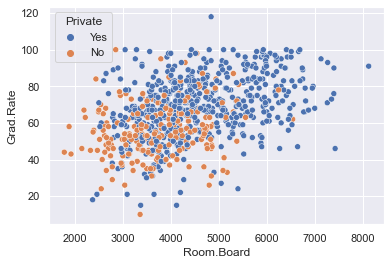

In [10]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=df)
plt.show()

##### 5.2 Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

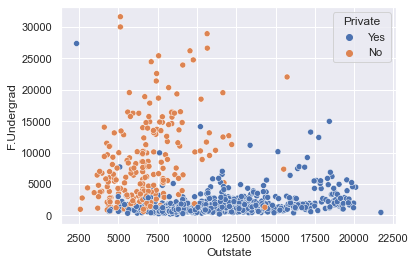

In [11]:
sns.scatterplot(x ='Outstate', y= 'F.Undergrad', hue = 'Private', data=df)
plt.show()

##### 5.3 Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using sns.FacetGrid. If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').

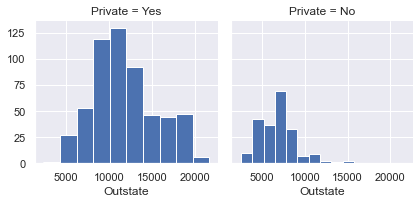

In [12]:
fcdgrd = sns.FacetGrid(df, col='Private')
fcdgrd  = fcdgrd.map(plt.hist, 'Outstate')

In [13]:
df['Private'] = df['Private'].map({
    'Yes':1,
    'No':0
})

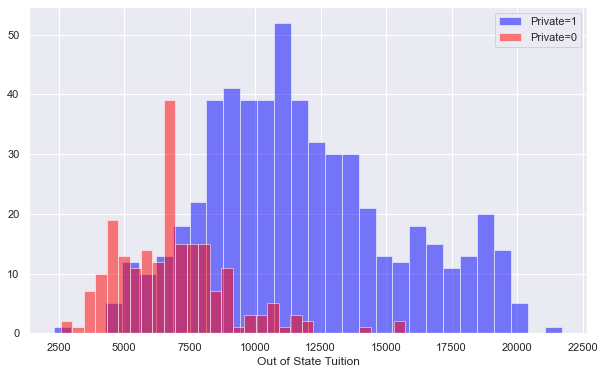

In [14]:
plt.figure(figsize=(10,6))
df[df['Private']==1]['Outstate'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'Private=1')
df[df['Private']==0]['Outstate'].hist(alpha = 0.5, color = 'red', bins = 30, label = 'Private=0')
plt.legend()
plt.xlabel('Out of State Tuition')
plt.show()

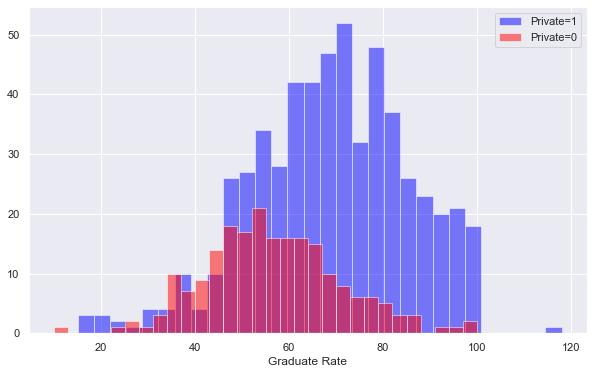

In [15]:
plt.figure(figsize=(10,6))
df[df['Private']==1]['Grad.Rate'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'Private=1')
df[df['Private']==0]['Grad.Rate'].hist(alpha = 0.5, color = 'red', bins = 30, label = 'Private=0')
plt.legend()
plt.xlabel('Graduate Rate')
plt.show()

##### 5.4 Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [16]:
print(df[df['Grad.Rate']>100])

           Unnamed: 0  Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College        1  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118  


## Predection

#### K Means Cluster Creation
Now it is time to create the Cluster labels!
Import KMeans from SciKit Learn.

#### 1. Import KMeans from SciKit Learn.

In [17]:
from sklearn.cluster import KMeans

#### 2. Create an instance of a K Means model with 2 clusters.

In [18]:
kmeans = KMeans(n_clusters=2)

#### 3. Fit the model to all the data except for the Private label.

In [19]:
print(df.head(2))

                     Unnamed: 0  Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University        1  1660    1232     721         23   
1            Adelphi University        1  2186    1924     512         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  


In [20]:
df=df.drop(("Unnamed: 0"),axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


In [22]:
print(df.head(2))

   Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  


In [23]:
#pip install threadpoolctl==3.1.0

In [24]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [25]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

#### 4. Evaluation
There is no perfect way to evaluate clustering if you don't have the labels, however since in this we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

#### 4.1. Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school

In [32]:
df['Private'] = df.Private.astype("category").cat.codes

In [33]:
df.Private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int8

In [30]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##### 4.2. Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df.Private, kmeans.labels_))
print(classification_report(df.Private, kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(df.Private, kmeans.labels_))
print(pd.DataFrame(classification_report(df.Private, kmeans.labels_, output_dict=True)))

0.7786357786357786
                    0           1  accuracy   macro avg  weighted avg
precision    0.685185    0.793722  0.778636    0.739454      0.764108
recall       0.349057    0.939823  0.778636    0.644440      0.778636
f1-score     0.462500    0.860616  0.778636    0.661558      0.751992
support    212.000000  565.000000  0.778636  777.000000    777.000000


In [40]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Private', axis=1)
y = df.Private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.35972387]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60077594]]
0.4774774774774775
[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



## Conclusion

Not bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data.

##### We can see that we got 77.865 as our accuracy score without using scalling, so that we can note that we got batter results on without using scalling so use the module without scalling